In [3]:
from __future__ import division
import numpy as np
import pandas as pd
import os
import json
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
save_file_path = '/Users/zonemercy/Desktop/LATEX/dissertation_2017/images/c5/'

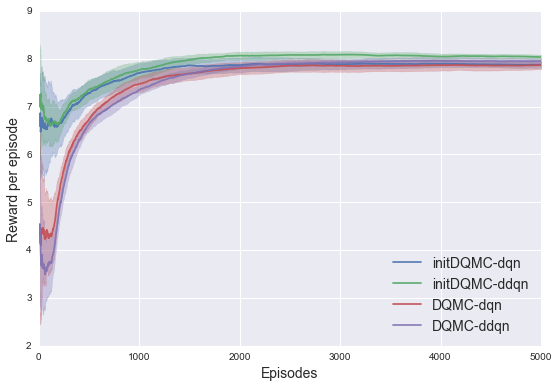

In [55]:
plt.figure(figsize=(9, 6));
folder = [
        'n20000_m1000_r3_eps_rms_dd0_ml4',
          'n20000_m1000_r3_eps_rms_dd1_ml4',
#           'n20000_m1000_r3_eps_adam_dd0_ml0',
        'n20000_m1000_r3_eps_rms_dd0_ml0',
#         'n20000_m1000_r3_eps_rms_dd0_ml2',
        'n20000_m1000_r3_eps_rms_dd1_ml0',
#         'n20000_m1000_r3_eps_rms_dd1_ml4',
            ]

for f in folder:
    bath_path = os.getcwd()+'/logging/'+f
    df_re=pd.DataFrame()
    for filename in os.listdir(bath_path):
        if '.json' in filename:
            filename = bath_path + '/' + filename
            with open(filename, 'r') as f:
                data = json.load(f)          
            df = pd.DataFrame(data)
            df = df['episode_reward']
            df_re = pd.concat([df_re,df], ignore_index=True, axis=1)
            df_re = df_re.dropna()

    for c in df_re.columns:
        df_re[c] = df_re[c].expanding(min_periods=10).mean()
#         n_c = np.convolve(df_re[c], np.ones(200)/200,mode='valid')
#         df_re[c] = np.append(n_c, np.repeat(np.nan, df_re.shape[0]-len(n_c)))

    df_re = df_re.dropna()
    df_re = df_re[:5000]
    df_re_mean = np.mean(df_re, axis=1)
    df_re_std = np.std(df_re, axis=1)
    
    fig=plt.plot(df_re.index, df_re_mean,alpha=0.9);
    color = fig[0].get_color();
    fig=plt.fill_between(df_re.index, df_re_mean - df_re_std, df_re_mean + df_re_std, 
                         interpolate=True,alpha=0.3,color=color);
    fig=plt.xlabel('Episodes', fontsize=14);
    fig=plt.ylabel('Reward per episode', fontsize=14);
    fig=plt.xlim(None,df_re.shape[0]);
    fig=plt.legend(('initDQMC-dqn','initDQMC-ddqn','DQMC-dqn','DQMC-ddqn'),
               loc='lower right', fontsize=14);
# plt.ylim(None,10);
plt.savefig(save_file_path+'c5-reward-ml.pdf');

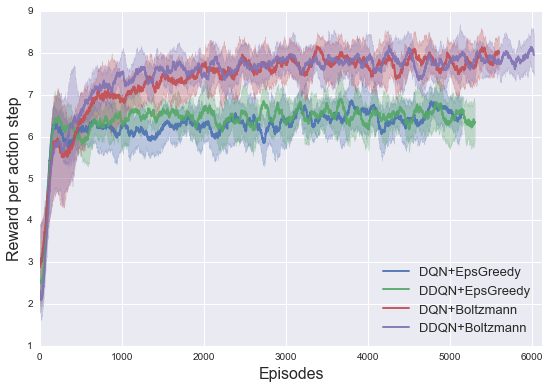

In [33]:
plt.figure(figsize=(9, 6));
folder = [
#         'n20000_m1000_r3_eps_rms_dd0_ml0',
          'n20000_m1000_r3_eps_rms_dd0_ml0',
#          'n20000_m5000_r3_eps_rms_dd0_ml0',
#          'n20000_m1000_r3_eps_rms_dd1_ml0',
          'n20000_m1000_r3_eps_rms_dd1_ml0',
#          'n20000_m5000_r3_eps_rms_dd1_ml0',
        'n20000_m1000_r3_grd_rms_dd0_ml0',
        'n20000_m1000_r3_grd_rms_dd1_ml0',
         ]

for f in folder:
    bath_path = os.getcwd()+'/logging/'+f
    df_re=pd.DataFrame()
    for filename in os.listdir(bath_path):
        if '.json' in filename:
            filename = bath_path + '/' + filename
            with open(filename, 'r') as f:
                data = json.load(f)
            
            df = pd.DataFrame(data)
            df = df['episode_reward']/df['nb_episode_steps']
            df_re = pd.concat([df_re,df], ignore_index=True, axis=1)
            df_re = df_re.dropna()

    for c in df_re.columns:
#         df_re[c] = df_re[c].expanding(min_periods=5).mean()
        n_c = np.convolve(df_re[c], np.ones(100)/100,mode='valid')
        df_re[c] = np.append(n_c, np.repeat(np.nan, df_re.shape[0]-len(n_c)))

#     df_re = df_re.dropna()
#     df_re = df_re[:5000]
    df_re_mean = np.mean(df_re, axis=1)
    df_re_std = np.std(df_re, axis=1)
    
    fig=plt.plot(df_re.index, df_re_mean,alpha=0.9,linewidth=2);
    color = fig[0].get_color();
    fig=plt.fill_between(df_re.index, df_re_mean - df_re_std, df_re_mean + df_re_std, 
                         interpolate=True,alpha=0.3,color=color);
    fig=plt.xlabel('Episodes', fontsize=16);
    fig=plt.ylabel('Reward per action step', fontsize=16);
    fig=plt.xlim(None,df_re.shape[0]);
    fig=plt.legend(('DQN+EpsGreedy','DDQN+EpsGreedy','DQN+Boltzmann','DDQN+Boltzmann'),
               loc='lower right', fontsize=13);
#     fig=plt.ylim(3,8);
    
plt.savefig(save_file_path+'c5-r-policy.pdf');

In [9]:
folder=[]
for d1 in ['eps','lin','bzm','grd']:
    for d2 in ['rms','adam']:
        for d3 in ['m1000','m2000','m5000']:
            for d4 in ['dd0','dd1']:
                folder.append('n20000_{}_r3_{}_{}_{}_ml0'.format(d3,d1,d2,d4))
# print folder
mean_list=[]
std_list=[]
for f in folder:
    bath_path = os.getcwd()+'/logging/'+f
    df_re=pd.DataFrame()
    for filename in os.listdir(bath_path):
        if '.json' in filename:
            filename = bath_path + '/' + filename
            with open(filename, 'r') as f:
                data = json.load(f)
            
            df = pd.DataFrame(data)
            df = df['episode_reward']/df['nb_episode_steps']
            df_re = pd.concat([df_re,df], ignore_index=True, axis=1)
            df_re = df_re.dropna()
    df_re = df_re[:5000]
    df_re_mean = np.mean(df_re, axis=0)
    df_re_std = np.std(df_re_mean)*2
    df_re_mean =  df_re_mean.mean()
    mean_list.append(df_re_mean)
    std_list.append(df_re_std)
# print mean_list,std_list

# ESB

In [58]:
folder = [
        'n20000_m1000_r3_eps_rms_dd0_ml0',
          'n20000_m2000_r3_eps_rms_dd0_ml0',
         'n20000_m5000_r3_eps_rms_dd0_ml0',
         'n20000_m1000_r3_eps_rms_dd1_ml0',
          'n20000_m2000_r3_eps_rms_dd1_ml0',
         'n20000_m5000_r3_eps_rms_dd1_ml0',
            'n20000_m1000_r3_bzm_rms_dd0_ml0',
          'n20000_m2000_r3_bzm_rms_dd0_ml0',
         'n20000_m5000_r3_bzm_rms_dd0_ml0',
         'n20000_m1000_r3_bzm_rms_dd1_ml0',
          'n20000_m2000_r3_bzm_rms_dd1_ml0',
         'n20000_m5000_r3_bzm_rms_dd1_ml0',

         ]
mean_list=[]
std_list=[]
for f in folder:
    bath_path = os.getcwd()+'/logging/'+f
    df_re=pd.DataFrame()
    for filename in os.listdir(bath_path):
        if '.csv' in filename:
            filename = bath_path + '/' + filename
            df = pd.read_csv(filename)
            df['esb'] =  df['log_esb'].apply(lambda x: np.sum(map(float, x[1:-1].split(", "))))
            df_re = pd.concat([df_re,df['esb']], ignore_index=True, axis=1)
            df_re = df_re.dropna()

    df_re = df_re[:4000]
    df_re_mean = np.mean(df_re, axis=0)
    df_re_std = np.std(df_re_mean)*2
    df_re_mean =  df_re_mean.mean()
    mean_list.append(df_re_mean)
    std_list.append(df_re_std)
print mean_list,std_list

[11.442352700000004, 11.078408250000006, 10.432010450000005, 11.154923925000002, 10.747137150000013, 10.112535925000014, 12.132951275000003, 11.801098425000001, 11.477421250000001, 11.374299624999981, 11.013703799999991, 11.091761075000013] [0.67185541686181294, 0.71838453200112629, 0.88719575861569833, 0.66947235939867678, 0.66428632170133439, 0.49181786586112608, 0.50701726585647733, 0.42668366607511249, 0.45209611454248994, 0.50571534869835033, 0.5239878741094981, 0.52596887716437701]


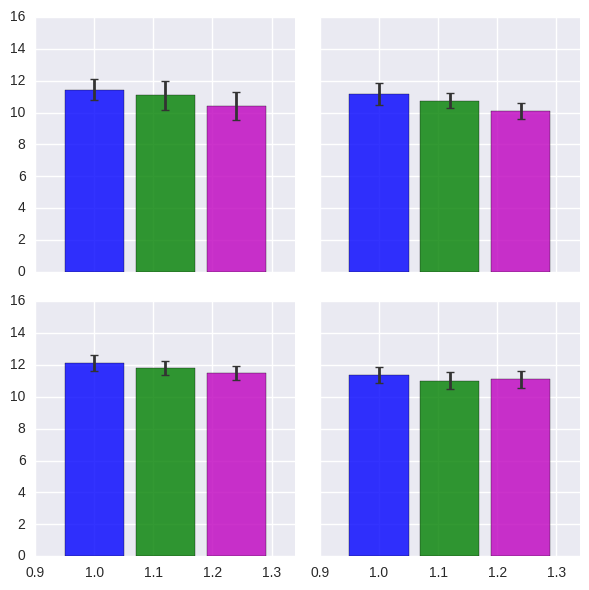

In [62]:
fig, axs = plt.subplots(2,2,sharex=True,sharey=True, figsize=(6, 6))
opacity = 0.8
error_config = dict(elinewidth=2,ecolor='.2',markeredgewidth=1)
width = 0.1
axs = axs.ravel()
l_index = 0

for i in range(4):
    rects1 = axs[i].bar(1, mean_list[l_index], width,
                     alpha=opacity,color='b',
                     yerr=std_list[l_index], align='center',
                     error_kw=error_config,
                     label='1000')
    rects2 = axs[i].bar(1+1.2*width, mean_list[l_index+1], width,
                     alpha=opacity,color='g',
                     yerr=std_list[l_index+2], align='center',
                     error_kw=error_config,
                     label='2000')
    rects3 = axs[i].bar(1+1.2*2*width, mean_list[l_index+2], width,
                     alpha=opacity,color='m',
                     yerr=std_list[l_index+2], align='center',
                     error_kw=error_config,
                     label='5000')    
    
    l_index = l_index+3
# plt.xlabel('Group')
# plt.ylabel('Scores')
# plt.title('Scores by group and gender')
# plt.xticks(index + bar_width / 2, ('A', 'B', 'C', 'D', 'E'))
# plt.legend()
plt.ylim(0,16)
plt.xlim(1-width,1+1.2*2*width+width);
plt.tight_layout()

In [81]:
folder = [
        'n20000_m1000_r3_grd_rms_dd0_ml0',
         ]
esb_dic=pd.read_csv('train5000.csv')
esb_dic['esb'] =  esb_dic['esb'].apply(lambda x: map(float, x[1:-1].split(", ")))
esb_dic['p_id'] =  esb_dic['p_id'].apply(lambda x: map(float, x[1:-1].split(", ")))

mean_list=[]
std_list=[]
for f in folder:
    bath_path = os.getcwd()+'/logging/'+f
    df_re=pd.DataFrame()
    df_esbr=pd.DataFrame()
    
    for filename in os.listdir(bath_path):
        if '.csv' in filename:
            filename = bath_path + '/' + filename
            df = pd.read_csv(filename)
            df['log_esb'] =  df['log_esb'].apply(lambda x: map(float, x[1:-1].split(", ")))
            df['esb'] =  df['log_esb'].apply(lambda x: np.sum(x))
            df_re = pd.concat([df_re,df['esb']], ignore_index=True, axis=1)
            df_re = df_re.dropna()
            c_n = 0
            esb_array=[]
            for r in df.index:
                len_tmp = len(df.loc[r,'log_esb'])
                esb_tmp=[]
                row = df.loc[r,'log_row']
                e_l = esb_dic.loc[row,'esb']
                p_l = esb_dic.loc[row,'p_id']
                e_min = np.argmin(e_l)
                for s in range(10):                   
                    if p_l[c_n]<0.4 and c_n<3:
                        c_n = c_n+1
                    elif p_l[c_n]>0.7 and c_n>0:
                        c_n = c_n-1
                    else: c_n = c_n
                    esb_tmp.append(e_l[c_n])
                    if c_n == e_min:
                        break
                    
                esb_array.append(esb_tmp)
            df['esb_r'] = esb_array
            df_esbr = pd.concat([df_esbr,df['esb_r'].apply(lambda x: np.sum(x))], ignore_index=True, axis=1)
                        
df_esbr.head()

,0,1,2,3,4,5,6,7,8,9
0,17.56000,11.7124,17.64510,14.4460,16.03990,12.02600,17.84400,63.89690,1.0518,1.43770
1,1.02870,64.6090,3.17540,6.0383,105.01500,62.51700,56.02200,19.09400,62.0289,14.78950
2,2.73610,2.8742,12.61400,1.8547,2.89910,65.49700,0.65016,0.62612,5.0975,3.40750
3,8.66994,108.3490,117.62100,31.8270,0.82981,0.77159,1.47730,10.46800,113.3650,3.37200
4,3.21910,11.5660,2.77779,2.2767,1.51370,2.90770,52.04300,0.85775,4.5783,1.80765


In [109]:
folder = [
        'n20000_m1000_r3_eps_rms_dd1_ml4',
         ]
df_ml = pd.DataFrame()
for f in folder:
    bath_path = os.getcwd()+'/logging/'+f
    
    for filename in os.listdir(bath_path):
        if '.csv' in filename:
            filename = bath_path + '/' + filename
            df = pd.read_csv(filename)
            df['log_esb'] =  df['log_esb'].apply(lambda x: map(float, x[1:-1].split(", ")))
            df['esb'] =  df['log_esb'].apply(lambda x: np.sum(x))
            df_ml = pd.concat([df_ml,df['esb']], ignore_index=True, axis=1)
            df_ml = df_ml.dropna()       

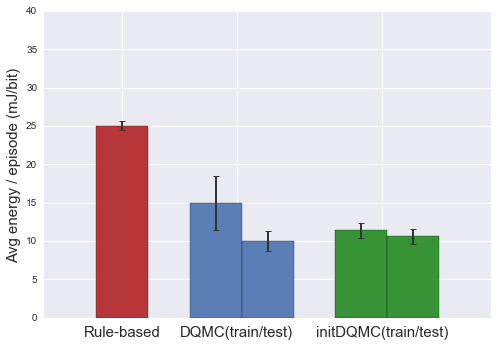

In [130]:
df_re1 = df_re[:2000]
df_re_mean1 = np.mean(df_re1, axis=0)
df_re_std1 = np.std(df_re_mean1)*2
df_re_mean1 =  df_re_mean1.mean() 

df_re2 = df_re[3000:]
df_re_mean2 = np.mean(df_re2, axis=0)
df_re_std2 = np.std(df_re_mean2)*2
df_re_mean2 =  df_re_mean2.mean() 

df_re3 = df_ml[:2000]
df_re_mean3 = np.mean(df_re3, axis=0)
df_re_std3 = np.std(df_re_mean3)*2
df_re_mean3 =  df_re_mean3.mean() 

df_re4 = df_ml[3000:]
df_re_mean4 = np.mean(df_re4, axis=0)
df_re_std4 = np.std(df_re_mean4)*2
df_re_mean4 =  df_re_mean4.mean() 

df_esbr_mean = np.mean(df_esbr, axis=0)
df_esbr_std = np.std(df_esbr_mean)*2
df_esbr_mean =  df_esbr_mean.mean()

error_config = dict(elinewidth=2,ecolor='.2',markeredgewidth=1)
width = 0.1
margin = 1.8
opacity = 0.9
plt.bar(1, df_esbr_mean, width,alpha=opacity,color='firebrick',
                     yerr=df_esbr_std, align='center',error_kw=error_config)
plt.bar(1+margin*width, df_re_mean1, width,alpha=opacity,
                    yerr=df_re_std1, align='center',error_kw=error_config)
plt.bar(1+margin*width+width, df_re_mean2, width,alpha=opacity,
                    yerr=df_re_std2, align='center',error_kw=error_config)
plt.bar(1+margin*2*width+width, df_re_mean3, width,alpha=opacity,
                    yerr=df_re_std3, align='center',error_kw=error_config,color='forestgreen')
plt.bar(1+margin*2*width+2*width, df_re_mean4, width,alpha=opacity,
                    yerr=df_re_std4, align='center',error_kw=error_config,color='forestgreen')

plt.xticks([1,1+margin*width+0.04,1+margin*2*width+0.14], ['Rule-based', 'DQMC(train/test)', 'initDQMC(train/test)'], fontsize=15)

# plt.xlabel('Episodes', fontsize=16);
plt.ylabel('Avg energy / episode (mJ/bit)', fontsize=15);
plt.xlim(1-1.5*width,1+margin*2*width+3.5*width);
plt.ylim(None,40);
plt.savefig(save_file_path+'c5-esb2.pdf');

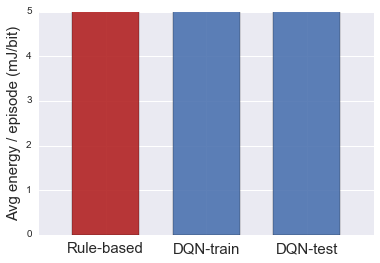

In [100]:
df_re1 = df_re[:1000]
df_re_mean1 = np.mean(df_re1, axis=0)
df_re_std1 = np.std(df_re_mean1)*2
df_re_mean1 =  df_re_mean1.mean() 

df_re2 = df_re[2000:]
df_re_mean2 = np.mean(df_re2, axis=0)
df_re_std2 = np.std(df_re_mean2)*2
df_re_mean2 =  df_re_mean2.mean() 

df_esbr_mean = np.mean(df_esbr, axis=0)
df_esbr_std = np.std(df_esbr_mean)*2
df_esbr_mean =  df_esbr_mean.mean()

error_config = dict(elinewidth=2,ecolor='.2',markeredgewidth=1)
width = 0.2
opacity = 0.9

plt.bar(1, df_esbr_mean, width,alpha=opacity,color='firebrick',
                     yerr=df_esbr_std, align='center',error_kw=error_config)
plt.bar(1+1.5*width, df_re_mean1, width,alpha=opacity,
                    yerr=df_re_std1, align='center',error_kw=error_config)
plt.bar(1+1.5*2*width, df_re_mean2, width,alpha=opacity,
                    yerr=df_re_std2, align='center',error_kw=error_config)

plt.xticks([1,1+1.5*width,1+1.5*2*width], ['Rule-based', 'DQN-train', 'DQN-test'], fontsize=15)

# plt.xlabel('Episodes', fontsize=16);
plt.ylabel('Avg energy / episode (mJ/bit)', fontsize=15);
plt.xlim(1-width,1+1.5*2*width+width);
plt.ylim(None,5);
plt.savefig(save_file_path+'c5-esb1-mean.pdf');

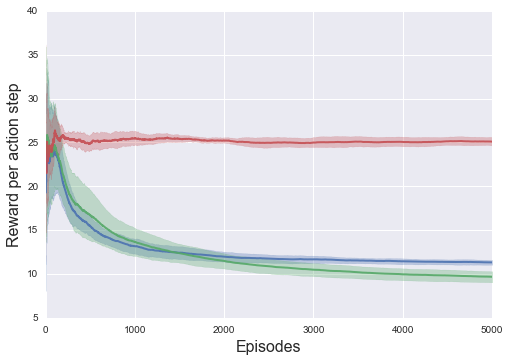

In [84]:
folder = [
        'n20000_m1000_r3_eps_rms_dd0_ml0',
#           'n20000_m2000_r3_eps_rms_dd0_ml0',
#          'n20000_m5000_r3_eps_rms_dd0_ml0',
         'n20000_m1000_r3_grd_rms_dd0_ml0',
#           'n20000_m2000_r3_eps_rms_dd1_ml0',
#          'n20000_m5000_r3_eps_rms_dd1_ml0',
#             'n20000_m1000_r3_bzm_rms_dd0_ml0',
#           'n20000_m2000_r3_bzm_rms_dd0_ml0',
#          'n20000_m5000_r3_bzm_rms_dd0_ml0',
#          'n20000_m1000_r3_bzm_rms_dd1_ml0',
#           'n20000_m2000_r3_bzm_rms_dd1_ml0',
#          'n20000_m5000_r3_bzm_rms_dd1_ml0',
         ]
mean_list=[]
std_list=[]
for f in folder:
    bath_path = os.getcwd()+'/logging/'+f
    df_re=pd.DataFrame()
    for filename in os.listdir(bath_path):
        if '.csv' in filename:
            filename = bath_path + '/' + filename
            df = pd.read_csv(filename)
            df['esb'] =  df['log_esb'].apply(lambda x: np.sum(map(float, x[1:-1].split(", "))))
            df_re = pd.concat([df_re,df['esb']], ignore_index=True, axis=1)
            df_re = df_re.dropna()

    for c in df_re.columns:
        df_re[c] = df_re[c].expanding(min_periods=5).mean()
#         n_c = np.convolve(df_re[c], np.ones(200)/200,mode='valid')
#         df_re[c] = np.append(n_c, np.repeat(np.nan, df_re.shape[0]-len(n_c)))

    df_re = df_re.dropna()
    df_re = df_re[:5000]
    df_re_mean = np.mean(df_re, axis=1)
    df_re_std = np.std(df_re, axis=1)
    
    fig=plt.plot(df_re.index, np.mean(df_re, axis=1),alpha=0.9,linewidth=2);
    color = fig[0].get_color();
    fig=plt.fill_between(df_re.index, df_re_mean - df_re_std, df_re_mean + df_re_std, 
                         interpolate=True,alpha=0.3,color=color);
    fig=plt.xlabel('Episodes', fontsize=16);
    fig=plt.ylabel('Reward per action step', fontsize=16);
    fig=plt.xlim(None,df_re.shape[0]);
#     fig=plt.legend(('DQN+EpsGreedy','DDQN+EpsGreedy','DQN+Boltzmann','DDQN+Boltzmann'),
#                loc='lower right', fontsize=13);
#     fig=plt.ylim(3,8);

df_esbr1=pd.DataFrame()
for c in df_esbr.columns:
    df_esbr1[c] = df_esbr[c].expanding(min_periods=5).mean()
df_esbr1_mean = np.mean(df_esbr1, axis=1)
df_esbr1_std = np.std(df_esbr1, axis=1)
fig=plt.plot(df_esbr1_mean.index, df_esbr1_mean,alpha=0.9,linewidth=2);
color = fig[0].get_color();
fig=plt.fill_between(df_esbr1_mean.index, df_esbr1_mean - df_esbr1_std, df_esbr1_mean + df_esbr1_std, 
                     interpolate=True,alpha=0.3,color=color);
plt.figure(figsize=(9, 6));


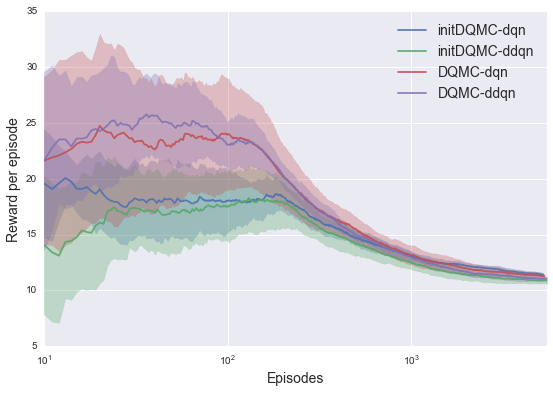

In [63]:
plt.figure(figsize=(9, 6));
folder = [
        'n20000_m1000_r3_eps_rms_dd0_ml4',
          'n20000_m1000_r3_eps_rms_dd1_ml4',
#           'n20000_m1000_r3_eps_adam_dd0_ml0',
        'n20000_m1000_r3_eps_rms_dd0_ml0',
#         'n20000_m1000_r3_eps_rms_dd0_ml2',
        'n20000_m1000_r3_eps_rms_dd1_ml0',
#         'n20000_m1000_r3_eps_rms_dd1_ml4',
            ]

for f in folder:
    bath_path = os.getcwd()+'/logging/'+f
    df_re=pd.DataFrame()
    for filename in os.listdir(bath_path):
        if '.csv' in filename:
            filename = bath_path + '/' + filename
            df = pd.read_csv(filename)
            df['esb'] =  df['log_esb'].apply(lambda x: np.sum(map(float, x[1:-1].split(", "))))
#             df_re = pd.concat([df_re,df['esb']], ignore_index=True, axis=1)
            df = df['esb']
            df_re = pd.concat([df_re,df], ignore_index=True, axis=1)
            df_re = df_re.dropna()

    for c in df_re.columns:
        df_re[c] = df_re[c].expanding(min_periods=10).mean()
#         n_c = np.convolve(df_re[c], np.ones(200)/200,mode='valid')
#         df_re[c] = np.append(n_c, np.repeat(np.nan, df_re.shape[0]-len(n_c)))
    df_re = df_re.dropna()
#     df_re = df_re[:5000]
    df_re_mean = np.mean(df_re, axis=1)
    df_re_std = np.std(df_re, axis=1)
    
    fig=plt.plot(df_re.index, df_re_mean,alpha=0.9);
    color = fig[0].get_color();
    fig=plt.fill_between(df_re.index, df_re_mean - df_re_std, df_re_mean + df_re_std, 
                         interpolate=True,alpha=0.3,color=color);
    fig=plt.xlabel('Episodes', fontsize=14);
    fig=plt.ylabel('Reward per episode', fontsize=14);
    fig=plt.xlim(None,df_re.shape[0]);
    fig=plt.legend(('initDQMC-dqn','initDQMC-ddqn','DQMC-dqn','DQMC-ddqn'),
               loc=0, fontsize=14);
# plt.ylim(None,10);
plt.xscale('symlog');
plt.xlim(10,None);
# plt.savefig(save_file_path+'c5-reward-ml.pdf');

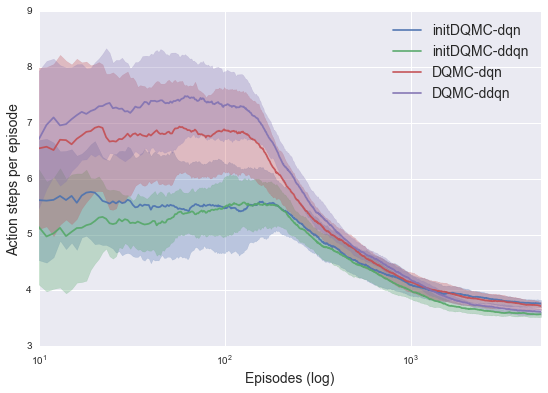

In [66]:
plt.figure(figsize=(9, 6));
folder = [
        'n20000_m1000_r3_eps_rms_dd0_ml4',
          'n20000_m1000_r3_eps_rms_dd1_ml4',
#           'n20000_m1000_r3_eps_adam_dd0_ml0',
        'n20000_m1000_r3_eps_rms_dd0_ml0',
#         'n20000_m1000_r3_eps_rms_dd0_ml2',
        'n20000_m1000_r3_eps_rms_dd1_ml0',
#         'n20000_m1000_r3_eps_rms_dd1_ml4',
            ]
for f in folder:
    bath_path = os.getcwd()+'/logging/'+f
    df_re=pd.DataFrame()
    for filename in os.listdir(bath_path):
        if '.json' in filename:
            filename = bath_path + '/' + filename
            with open(filename, 'r') as f:
                data = json.load(f)          
            df = pd.DataFrame(data)
            df = df['nb_episode_steps']
            df_re = pd.concat([df_re,df], ignore_index=True, axis=1)
            df_re = df_re.dropna()

    for c in df_re.columns:
        df_re[c] = df_re[c].expanding(min_periods=10).mean()
#         n_c = np.convolve(df_re[c], np.ones(200)/200,mode='valid')
#         df_re[c] = np.append(n_c, np.repeat(np.nan, df_re.shape[0]-len(n_c)))

    df_re = df_re.dropna()
    df_re = df_re[:5000]
    df_re_mean = np.mean(df_re, axis=1)
    df_re_std = np.std(df_re, axis=1)
    
    fig=plt.plot(df_re.index, df_re_mean,alpha=0.9);
    color = fig[0].get_color();
    fig=plt.fill_between(df_re.index, df_re_mean - df_re_std, df_re_mean + df_re_std, 
                         interpolate=True,alpha=0.3,color=color);
    fig=plt.xlabel('Episodes (log)', fontsize=14);
    fig=plt.ylabel('Action steps per episode', fontsize=14);
    fig=plt.xlim(None,df_re.shape[0]);
    fig=plt.legend(('initDQMC-dqn','initDQMC-ddqn','DQMC-dqn','DQMC-ddqn'),
               loc=0, fontsize=14);
# plt.ylim(None,10);
plt.xscale('symlog');
plt.xlim(10,None);
plt.savefig(save_file_path+'c5-nstep-ml.pdf');